In [651]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from operator import attrgetter
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize': (18, 6)})

## *Предварительный анализ данных*

In [652]:
# Считываем данные с уникальными идентификаторами пользователей
customers = pd.read_csv('olist_customers_dataset.csv')

In [653]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [654]:
# Количество строк и столбцов
customers.shape

(99441, 5)

In [655]:
# Проверяем данные на пропуски
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [656]:
# Проверяем типы данных
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [657]:
# Количество уникальных городов
customers.customer_city.nunique()

4119

In [658]:
# Количество уникальных штатов
customers.customer_state.nunique()

27

In [659]:
# Количество уникальных пользователей
customers.customer_unique_id.nunique()

96096

In [660]:
# Посмотрим на распределение уникальных пользователей по городам
customer_city = customers.groupby('customer_city').agg({'customer_unique_id': 'nunique'}).reset_index()\
                                  .sort_values('customer_unique_id', ascending=False)

In [661]:
customer_city.head()

,customer_city,customer_unique_id
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465


<Axes: xlabel='customer_city', ylabel='customer_unique_id'>

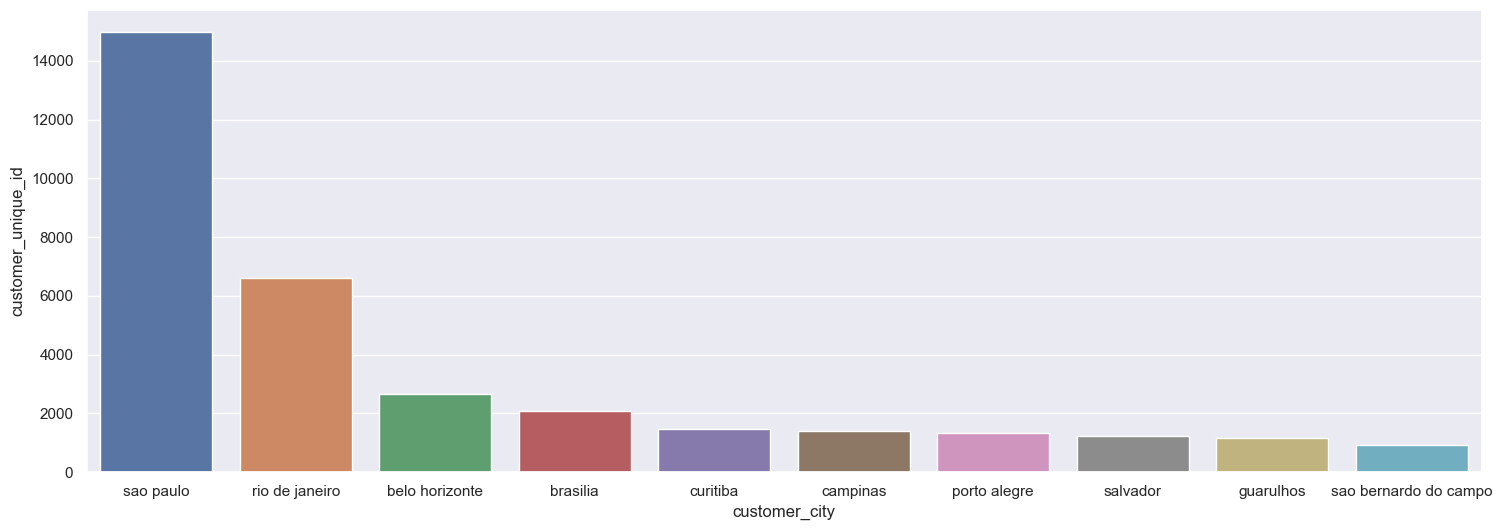

In [662]:
# Посмотрим на 10 гороодов с самым большим количеством уникальных пользователей
sns.barplot(x='customer_city', y='customer_unique_id', data=customer_city.head(10))

In [663]:
# Посмотрим на распределение уникальных пользователей по штатам
customer_state = customers.groupby('customer_state').agg({'customer_unique_id': 'nunique'}).reset_index() \
                                  .sort_values('customer_unique_id', ascending=False)

<Axes: xlabel='customer_state', ylabel='customer_unique_id'>

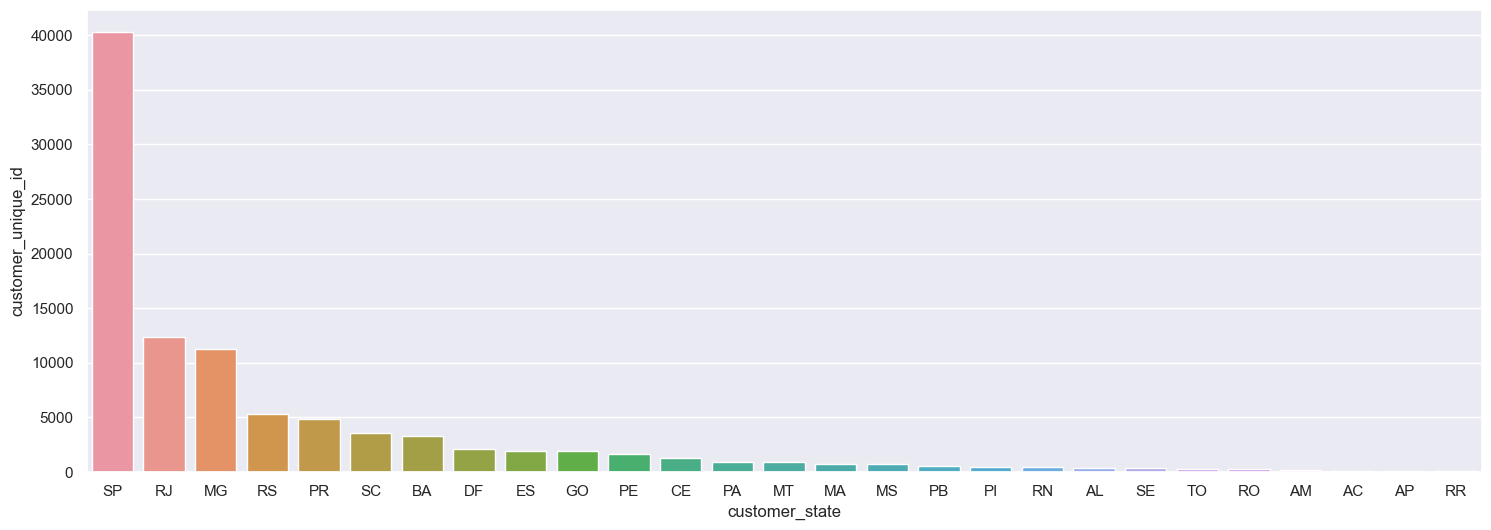

In [664]:
sns.barplot(x='customer_state', y='customer_unique_id', data=customer_state)

In [665]:
# Считываем данные с таблицей заказов
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [666]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [667]:
# Количество строк и столбцов
order_items.shape

(112650, 7)

In [669]:
# Проверяем данные на пропуски
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [670]:
# Проверяем типы данных
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [671]:
# Количество уникальных продуктов
order_items.product_id.nunique()

32951

In [672]:
# Количество уникальных продавцов
order_items.seller_id.nunique()

3095

In [673]:
# Посмотрим на 10 самых популярных товаров
order_items.groupby('product_id')['order_id'].count().reset_index().sort_values('order_id', ascending=False).head(10)

,product_id,order_id
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527
19742,99a4788cb24856965c36a24e339b6058,488
8613,422879e10f46682990de24d770e7f83d,484
7364,389d119b48cf3043d311335e499d9c6b,392
7079,368c6c730842d78016ad823897a372db,388
10840,53759a2ecddad2bb87a079a1f1519f73,373
27039,d1c427060a0f73f6b889a5c7c61f2ac4,343
10867,53b36df67ebb7c41585e8d54d6772e08,323
2794,154e7e31ebfa092203795c972e5804a6,281
8051,3dd2a17168ec895c781a9191c1e95ad7,274


In [674]:
# Посмотрим на количество товаров в одном заказе.
order_items.groupby('order_id')['order_item_id'].count().reset_index().sort_values('order_item_id', ascending=False).head()

,order_id,order_item_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15


In [675]:
# Считываем данные с товарными позициями, входящими в заказы и сразу переводим колонки с датой в соответствующий формат
order = pd.read_csv('olist_orders_dataset.csv', parse_dates=[3, 4, 5, 6, 7])

In [676]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [677]:
# Количество строк и столбцов
order.shape

(99441, 8)

In [678]:
# Проверяем данные на пропуски
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [679]:
# Посмотрим какие есть статусы заказов
order.value_counts('order_status')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
dtype: int64

In [680]:
# В 3x колонках есть пропуски. Так как у нас колонка order_approved_at (время подтверждения оплаты заказа) 
# отвечает за покупку, можно посмотреть как заменить пропущенные значения. 
# Ближайшая к ней по смыслу колонка order_purchase_timestamp —  время создания заказа.
# Можно сделать замену пустых значений в колонке order_approved_at на значения из колонки order_purchase_timestamp.
# Чтобы обосновать данный подход, оставим только не пустые значения из колонки order_approved_at.
# Далее сделаем сравнение и посмотрим насколько данные в колонках order_purchase_timestamp и order_approved_at различаются. 

In [681]:
# Отфильтруем не пропущенные значения
df_order_notna = order[order.order_approved_at.notna()]

In [682]:
# Оставим только даты 
df_order_notna['order_purchase_timestamp'] = df_order_notna['order_purchase_timestamp'].dt.date
df_order_notna['order_approved_at'] = df_order_notna['order_approved_at'].dt.date

In [683]:
# Посмотрим сколько совпадений между датами создания и подтверждения заказа
df_order_notna.query('order_purchase_timestamp == order_approved_at').shape[0]

68731

In [684]:
# Всего 99281 строка, из которых даты равны у 68731 строки
df_order_notna.shape[0]

99281

In [685]:
# Посчитаем разницу в днях
df_order_notna['dif_date'] = (df_order_notna['order_approved_at'] - df_order_notna['order_purchase_timestamp']).dt.days

In [686]:
# Посмотрим на описательные сттистики колонки dif_date. 
# У нас в большинстве случаев нет разницы между датами order_approved_at и order_purchase_timestamp.
# Т.е. даты создания и подтверждения заказа совпадают.
df_order_notna.dif_date.describe()

count    99281.000000
mean         0.518508
std          1.171324
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        188.000000
Name: dif_date, dtype: float64

In [687]:
# Произведём замену пропущенных значений в колонке order_approved_at на значения из колонки order_purchase_timestamp
order.loc[order.order_approved_at.isna(), 'order_approved_at'] = order.loc[order.order_approved_at.isna(), 'order_purchase_timestamp']

In [688]:
# Посмотрим остались ли пропуски в колонке order_approved_at
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [689]:
# Остались пропуски в order_delivered_carrier_date (время передачи заказа в логистичекую службу)
# и order_delivered_customer_date (время доставки заказа).
# Данные колонки оставим как есть, ведь у нас есть проблемные заказы (отменённые и недоступные)

In [690]:
# Проверяем типы данных
order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [691]:
order['order_delivered_customer_date'] = order['order_delivered_customer_date'].dt.date
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])

In [693]:
# Посмотрим на заказы с задержкой доставки, т.е. у тех где фактическая дата доставки позже обещанной.
# Для начала отфильтруем только доставленные заказы.
order_1 = order.query("order_status == 'delivered'")
order_1.query('order_delivered_customer_date > order_estimated_delivery_date').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09,2017-09-28
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21,2018-03-12
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28,2017-12-21
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03,2018-04-02
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06,2017-03-30


In [694]:
# Создадим новую колонку и посчитаем разницу между фактической датой доставки и обещанной.
order_1['delay_day'] = (order_1['order_delivered_customer_date'] - order_1['order_estimated_delivery_date']).dt.days

In [695]:
order_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,-10.0


In [696]:
# Отфильтруем данные и оставим заказы с задержкой доставки. Это 6,7% от всех заказов
order_1.query('delay_day > 0').shape[0]

6534

<Axes: xlabel='delay_day'>

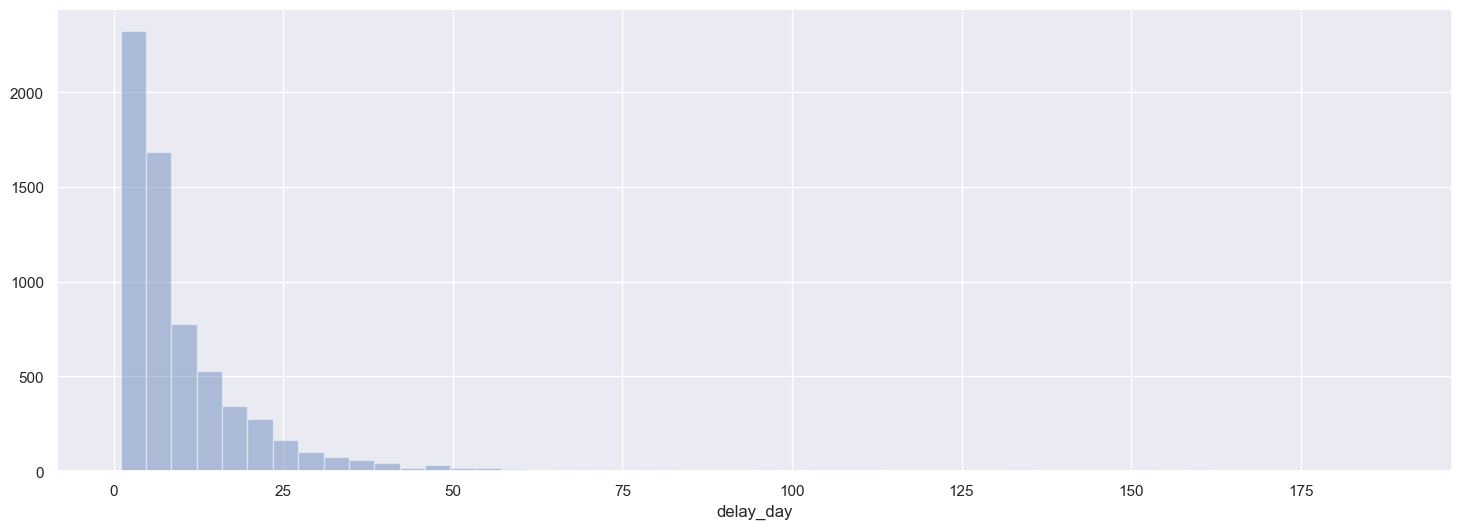

In [697]:
# Посмотрим на распределение заказов с задержкой доставки
sns.distplot(order_1[order_1.delay_day > 0]['delay_day'], kde=False)

In [698]:
# Посмотрим на заказы, которые доставили раньше обещанного срока. Таких заказов 88644
order_1.query('delay_day < 0').shape[0]

88644

In [699]:
# Посмотрим на заказы, у которых фактическая дата доставки совпадает с обещанной. Таких заказов 1292
order_1.query('delay_day == 0').shape[0]

1292

In [700]:
# Для некоторых заказов отсутствует информация о дате доставки, поэтому столбец delay_day не посчитался у таких заказов
order_1[order_1.delay_day.isna()].shape[0]

8

In [701]:
# Посмотрим на описательные статистики у заказов с задержкой доставки
order_1[order_1.delay_day > 0].describe()

,delay_day
count,6534.000000
mean,10.620141
std,14.644955
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,188.000000


In [702]:
# Можно посмотреть более подробно. Получается, что у 5% заказов срок задержки более 31 дня, а у 1% более 71 дня.
order_1[order_1.delay_day > 0].quantile(q=[0.8, 0.85, 0.9, 0.93, 0.95, 0.97, 0.98, 0.99])

,delay_day
0.80,15.00
0.85,18.00
0.90,22.00
0.93,27.00
0.95,31.00
0.97,40.00
0.98,49.00
0.99,71.34


In [703]:
# Можно посчитать долю задержанных заказов по штатам и городам.

In [704]:
# Объединим датафреймы и создадим колонку, которая понадобится для подсчёта задержанных заказов 
delay_order = customers.merge(order_1).merge(order_items)

In [705]:
# Отфильтруем только доставленные заказы
delay_order = delay_order.query("order_status == 'delivered'")

In [706]:
delay_order['delay'] = delay_order['delay_day'].apply(lambda x: 1 if x > 0 else 0)

In [707]:
delay_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_day,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017-06-05,-11.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29,2018-02-06,-8.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14,2018-06-13,1.0,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28,2018-04-10,-13.0,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09,2018-08-15,-6.0,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,0


In [708]:
# Сгруппируем данные по штатам и посчитаем все и задержанные заказы
delay_order_state = delay_order.groupby('customer_state').agg({'delay': 'sum', 'order_id': 'count'})

In [709]:
# Создадим новую колонку и посчитаем долю задержанных заказов
delay_order_state['delay_rate'] = round((delay_order_state.delay / delay_order_state.order_id).mul(100), 2)

In [710]:
# Выведем штаты с долей задержанных заказов по убыванию
delay_order_state.sort_values('delay_rate', ascending=False).head()

,delay,order_id,delay_rate
customer_state,,,
AL,89,427,20.84
MA,144,800,18.00
SE,61,375,16.27
CE,194,1426,13.60
PI,71,523,13.58


In [711]:
# Посчитаем долю задержанных заказов по городам
delay_order_city = delay_order.groupby('customer_city').agg({'delay': 'sum', 'order_id': 'count'})
delay_order_city['delay_rate'] = round((delay_order_city.delay / delay_order_city.order_id).mul(100), 2)
delay_order_city.sort_values('delay_rate', ascending=False).head()

,delay,order_id,delay_rate
customer_city,,,
portela,1,1,100.0
maioba,2,2,100.0
raposo,4,4,100.0
glaura,1,1,100.0
gilbues,1,1,100.0


In [712]:
# В магазинах некторых городов всего 1 заказ, поэтому 1 задержанный заказ будет давать 100%. 
# Посмотрим на описательные статистики заказов
delay_order_city.order_id.describe()

count     4085.000000
mean        26.976010
std        313.044839
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max      17400.000000
Name: order_id, dtype: float64

In [713]:
# В 25% случаев не более 1 заказа.
# Отфильтруем данные где больше 3 заказов (по медиане).
delay_order_city.query('order_id > 3').sort_values('delay_rate', ascending=False).head()

,delay,order_id,delay_rate
customer_city,,,
raposo,4,4,100.0
sao miguel dos campos,4,5,80.0
arneiroz,3,4,75.0
cacule,3,4,75.0
arace,3,4,75.0


Выводы:

Среди всех заказов 6534 (что составляет 6,7%) доставлены с задержкой сроков доставки. 1292 заказа пришли ровно с срок. 86644 заказов пришли раньше обещанной даты доставки. Посчитана метрика delay_rate (доля задержанных заказов). Среди штатов с самой большой долей задержанных заказов: AL, MA, SE, СЕ, PI. Для полученных городов и штатов можно взять больше данных и изучить причины задержек. Может проблема в самой организации логистики. Возможны проблемы технического характера: уведомления об оплате товара приходят не вовремя (например, проблема в мобильном приложении, если такое имеется) или данные на склад приходят с задержкой.

##  *1. Сколько у нас пользователей, которые совершили покупку только один раз?*

In [715]:
# Покупкой будем считать заказы со статусами: в поцессе сборки заказа, отгружен со склада, доставлен.
# Так как если заказ находится в процессе сборки и отгружен со склада, то покупатель уже совершил оплату и можно счиатать это за покупку.
# Отфильтруем данные так, чтобы остались только заказы с указанными статусами.
buy_orders = customers.merge(order)
buy_orders_1 = buy_orders.query("order_status == ['delivered', 'processing', 'shipped']")

In [716]:
buy_orders_1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09,2018-08-15


In [717]:
# Сгруппируем по уникальному идентификатору пользователя. 
buy_orders_1 = buy_orders_1.groupby('customer_unique_id', as_index=False).agg({'order_id': 'count'})

In [718]:
buy_orders_1.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [719]:
# Отфильтруем данные, чтобы узнать сколько пользователей совершили только одну покупку. 
buy_orders_1.query('order_id == 1').shape[0]

91814

91 814 пользователей совершили одну покупку.

## *2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?*

In [720]:
# Отберём все заказы у которых статус недоступен и отменён.
buy_orders.query("order_status == ['unavailable', 'canceled']").head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30


In [721]:
not_delivered = buy_orders.query("order_status == ['unavailable', 'canceled']")

In [722]:
not_delivered.shape[0]

1234

In [723]:
# Создадим новую колонку, в которую поместим номер месяца и год заказа.
not_delivered = not_delivered.assign(order_purchase_Month = not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m'))

In [724]:
not_delivered.groupby(['order_purchase_Month', 'order_status'], as_index=False) \
        .agg({'order_id': 'count'}) \
        .groupby('order_status', as_index=False) \
        .agg({'order_id': 'mean'}) \
        .round() \
        .sort_values('order_id')

,order_status,order_id
0,canceled,26.0
1,unavailable,29.0


В месяц в среднем не доставляется 26 заказов по причине отмены и 29 по причине товар недоступен.

## 3. *По каждому товару определить, в какой день недели товар чаще всего покупается.*

In [725]:
order_weeks = order_items.merge(order)

In [726]:
# Учтём только покупки.
order_weeks = order_weeks.query("order_status in ['shipped', 'processing', 'delivered']")

In [727]:
# Добавим колонку с днями недели оплаты заказа.
order_weeks = order_weeks.assign(order_day = order_weeks.order_approved_at.dt.day_name())

In [728]:
order_weeks = order_weeks.groupby(['product_id', 'order_day'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .sort_values('customer_id', ascending=False) \
    .drop_duplicates('product_id')

In [729]:
# Самый популярный товар покупается во вторник
order_weeks.head()

,product_id,order_day,customer_id
40705,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19967,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15794,422879e10f46682990de24d770e7f83d,Tuesday,89
36228,99a4788cb24856965c36a24e339b6058,Tuesday,82
12955,368c6c730842d78016ad823897a372db,Thursday,80


## *4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.*

In [730]:
# Для решениия этой задачи используем все три датафрейма
df_4 = customers.merge(order).merge(order_items)

In [731]:
df_4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [732]:
# Отфильтруем только покупки.
df_4 = df_4.query("order_status in ['shipped', 'processing', 'delivered']")

In [733]:
# Так как нас интересуют покупки, для работы с датами возьмем order_approved_at —  время подтверждения оплаты заказа

In [734]:
df_4_group = df_4.groupby(['customer_unique_id', 'order_approved_at'], as_index=False) \
    .agg({'order_id': 'count'})

In [735]:
# Создадим колонку с номером месяца времени подтверждения оплаты заказа
df_4_group = df_4_group.assign(order_approved_month = df_4_group.order_approved_at.dt.month)

In [736]:
# Создаем новую колоку с количеством дней в месяце
df_4_group['order_approved_day_month'] = df_4_group.order_approved_at.dt.daysinmonth

In [737]:
# Создаем новую колоку с количеством недель в каждом месяце
df_4_group['number_of_week'] = round(df_4_group.order_approved_day_month / 7, 2)

In [738]:
# Теперь считаем сколько покупок в неделю приходится на пользователя
df_4_group['number_of_purchases'] = round(df_4_group.order_id / df_4_group.number_of_week, 2)

In [739]:
# Переводим в формат ГГ-ММ
df_4_group.order_approved_at = df_4_group.order_approved_at.dt.strftime('%Y-%m')

In [740]:
# Выводим результат по количеству покупок в неделю (с сортировкой по убыванию)
df_4_group.sort_values('number_of_purchases', ascending=False)

,customer_unique_id,order_approved_at,order_id,order_approved_month,order_approved_day_month,number_of_week,number_of_purchases
74995,c402f431464c72e27330a67f7b94d4fb,2018-02,20,2,28,4.00,5.00
26504,4546caea018ad8c692964e3382debd19,2017-07,21,7,31,4.43,4.74
40426,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,8,31,4.43,4.51
5885,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,15,11,30,4.29,3.50
94784,f7ea4eef770a388bd5b225acfc546604,2018-02,14,2,28,4.00,3.50
...,...,...,...,...,...,...,...
35707,5d1e0993152cd3281cc384879167609c,2018-01,1,1,31,4.43,0.23
35706,5d1d2bf42c3a6bd8cd1a8a4dbf29983d,2018-07,1,7,31,4.43,0.23
35705,5d1b18fb7cdd9337373abe5b471e089b,2017-05,1,5,31,4.43,0.23
35704,5d1ab8c4c79f6f25c2da105854c511f7,2018-07,1,7,31,4.43,0.23


## *5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.*

In [741]:
customers_order = customers.merge(order_1)

In [742]:
customers_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017-06-05,-11.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29,2018-02-06,-8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14,2018-06-13,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28,2018-04-10,-13.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09,2018-08-15,-6.0


In [743]:
# Создаем колонку с датой первой покупки
customers_order['first_buy_date'] = customers_order.groupby('customer_unique_id')['order_approved_at'].transform('min')

In [744]:
customers_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_day,first_buy_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017-06-05,-11.0,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29,2018-02-06,-8.0,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14,2018-06-13,1.0,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28,2018-04-10,-13.0,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09,2018-08-15,-6.0,2018-07-29 10:10:09


In [745]:
# Оставляем в колонках дату и месяц
customers_order['first_buy_date'] = pd.to_datetime(customers_order['first_buy_date']).dt.to_period('m')
customers_order['order_approved_at'] = pd.to_datetime(customers_order['order_approved_at']).dt.to_period('m')

In [746]:
# Считаем разницу между месяцем первой и последующих покупок
customers_order['period'] = (customers_order.order_approved_at - customers_order.first_buy_date).apply(attrgetter("n"))

In [747]:
customers_order = customers_order.query("order_status == ['processing', 'shipped', 'delivered']") \
    .query("'2017-01' <= first_buy_date <= '2017-12'") \
    .groupby(['first_buy_date', 'period'])['customer_unique_id'].nunique().reset_index()

In [748]:
customers_order_p = customers_order.pivot(index='first_buy_date', columns='period', values='customer_unique_id')

In [749]:
customers_order_p

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy_date,,,,,,,,,,,,,,,,,,,
2017-01,685.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1624.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,2511.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,7.0,3.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04,2232.0,14.0,5.0,4.0,5.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05,3453.0,18.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,10.0,12.0,6.0,2.0,6.0,7.0,NaN,NaN,NaN
2017-06,3044.0,15.0,12.0,13.0,9.0,11.0,11.0,7.0,4.0,6.0,9.0,12.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-07,3709.0,20.0,12.0,7.0,13.0,7.0,12.0,4.0,7.0,9.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4081.0,28.0,15.0,11.0,15.0,21.0,11.0,11.0,5.0,7.0,10.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4025.0,27.0,20.0,13.0,17.0,11.0,9.0,9.0,12.0,7.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [750]:
# Cчитаем retention
customers_order_p = round(customers_order_p.div(customers_order_p.iloc[:,0], axis = 0).mul(100), 2)

In [751]:
customers_order_p

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy_date,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.44,0.29,0.15,0.44,0.15,0.44,0.15,0.15,NaN,0.29,0.29,0.73,0.44,0.15,0.15,0.29,0.44,0.15
2017-02,100.0,0.18,0.25,0.18,0.43,0.12,0.25,0.18,0.12,0.18,0.12,0.31,0.12,0.18,0.12,0.06,0.06,0.18,NaN
2017-03,100.0,0.44,0.36,0.36,0.36,0.16,0.16,0.32,0.28,0.12,0.36,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN
2017-04,100.0,0.63,0.22,0.18,0.22,0.27,0.36,0.27,0.36,0.18,0.22,0.09,0.04,0.04,0.09,0.09,0.13,NaN,NaN
2017-05,100.0,0.52,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26,0.29,0.35,0.17,0.06,0.17,0.20,NaN,NaN,NaN
2017-06,100.0,0.49,0.39,0.43,0.30,0.36,0.36,0.23,0.13,0.20,0.30,0.39,0.16,0.16,0.23,NaN,NaN,NaN,NaN
2017-07,100.0,0.54,0.32,0.19,0.35,0.19,0.32,0.11,0.19,0.24,0.22,0.30,0.13,0.24,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.69,0.37,0.27,0.37,0.51,0.27,0.27,0.12,0.17,0.25,0.17,0.15,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.67,0.50,0.32,0.42,0.27,0.22,0.22,0.30,0.17,0.25,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='period', ylabel='first_buy_date'>

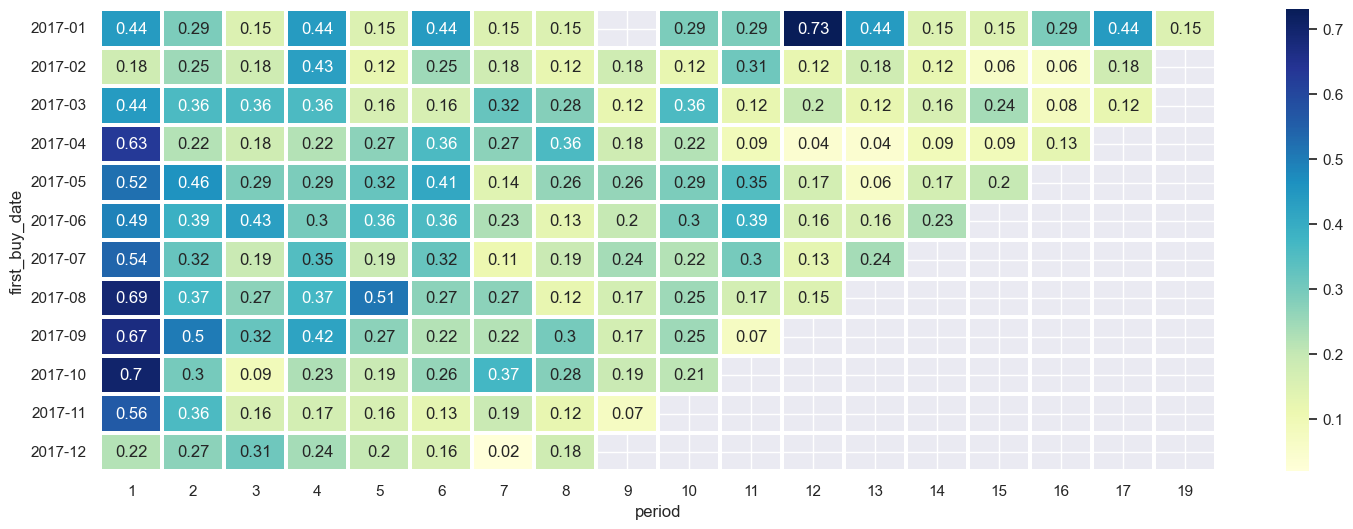

In [752]:
sns.heatmap(customers_order_p.loc[:, 1:], linewidths=1.5, cmap='YlGnBu', annot=True)

In [753]:
# Выводим когорту с максимальным retention на 3 месяц
customers_order_p[3].idxmax()

Period('2017-06', 'M')

*По результатам исследования больше всего пользователей, вернувшихся на 3 месяц, совершили первую покупку в июне 2017 года.*

## 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [754]:
# Объединим датафреймы.
df_6 = customers.merge(order_1).merge(order_items)

In [755]:
# Оставим только тех пользователей, что совершили покупки.
df_6 = df_6.query("order_status == ['delivered', 'processing', 'shipped']")

In [756]:
# Посчитаем M - сумму покупок за всё время по каждому пользователю.
M = df_6.groupby('customer_unique_id', as_index=False)['price'].sum() \
    .rename(columns={'price': 'Monetary'})

In [757]:
# Посмотрим на клиентов, потративших больше всего
M.sort_values('Monetary', ascending=False).head()

,customer_unique_id,Monetary
3724,0a0a92112bd4c708ca5fde585afaa872,13440.0
79636,da122df9eeddfedc1dc1f5349a1a690c,7388.0
43168,763c8b1c9c68a0229c42c9fc6f662b93,7160.0
80463,dc4802a71eae9be1dd28f5d788ceb526,6735.0
25436,459bef486812aa25204be022145caa62,6729.0


In [758]:
# Посмотрим на клиентов, потративших меньше всего
M.sort_values('Monetary', ascending=False).tail()

,customer_unique_id,Monetary
75622,cf3839da0d9492ad151690b65f45d800,2.99
69027,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29
18102,317cfc692e3f86c45c95697c61c853a6,2.20
65551,b38211bd797f4fdd81a98b9d1754b606,0.85
78899,d80730c15c647bc8f2ad77c908ba5ca9,0.85


In [759]:
# Посчитаем F - суммарное количество покупок у пользователя за всё время.
# Для того, чтобы посчитать количество покупок возьмем колонку order_approved_at время подтверждения оплаты заказа.
F = df_6.groupby('customer_unique_id', as_index=False)['order_id'].count().rename(columns={'order_id': 'Frequency'})

In [760]:
# Посмотрим на клиентов с самым большим количеством покупок
F.sort_values('Frequency', ascending=False).head()

,customer_unique_id,Frequency
73127,c8460e4251689ba205045f3ea17884a1,24
25309,4546caea018ad8c692964e3382debd19,21
38579,698e1cf81d01a3d389d96145f7fa6df8,20
71566,c402f431464c72e27330a67f7b94d4fb,20
5622,0f5ac8d5c31de21d2f25e24be15bbffb,18


In [761]:
# Посчитаем R - время от последней покупки пользователя до текущей даты.
# В качестве текущей даты возьмём последний день из order_approved_at и прибавим 1 день
max_day = df_6.order_approved_at.max() + timedelta(days=1)

In [762]:
# Посчитаем R
df_6.order_approved_at = pd.to_datetime(df_6.order_approved_at)
R = df_6.groupby('customer_unique_id', as_index=False)['order_approved_at'] \
    .agg({'order_approved_at': lambda x: (max_day - x.max()).days}) \
    .rename(columns={'order_approved_at': 'Recency'})

In [763]:
# Посмотрим на клиентов, отсутствовавших дольше всего
R.sort_values('Recency', ascending=False).head()

,customer_unique_id,Recency
47882,830d5b7aaa3b6f1e9ad63703bec97d23,714
3016,0829f7df6577d5a4b65439bea701405f,695
81529,df2988ba3ed226b10521a0e4da849b61,695
6221,10e89fd8e5c745f81bec101207ba4d7d,695
27714,4be873e3bf0455763882101d7eccc78c,695


In [766]:
# Соединим все три полученных датафрейма.
RFM = R.merge(F).merge(M)

In [767]:
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [768]:
# Разобьём данные на квантили.
RFM_seg = RFM[['Recency','Monetary']].quantile(q=[0.20, 0.40, 0.60, 0.80]).to_dict()

In [769]:
RFM_seg

{'Recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [770]:
# Напишем функцию, которая сегментирует пользователей (от 1 до 5) по R (давности совершения покупок).
def r_score(x):
    if x <= RFM_seg['Recency'][0.2]:
        return 5
    elif x <= RFM_seg['Recency'][0.4]:
        return 4
    elif x <= RFM_seg['Recency'][0.6]:
        return 3
    elif x <= RFM_seg['Recency'][0.8]:
        return 2
    else:
        return 1

In [792]:
# Напишем функцию, которая сегментирует пользователей (от 1 до 5) по M (общей сумме затрат).
def m_score(x, c):
    if x <= RFM_seg[c][0.2]:
        return 1
    elif x <= RFM_seg[c][0.4]:
        return 2
    elif x <= RFM_seg[c][0.6]:
        return 3
    elif x <= RFM_seg[c][0.8]:
        return 4
    else:
        return 5    

In [806]:
# Напишем функцию, которая сегментирует пользователей (от 1 до 5) по F (частоте совершения покупок).
def f_score(x):
    if x <= 3:
        return 1
    elif x <= 8:
        return 2
    elif x <= 13:
        return 3
    elif x <= 18:
        return 4
    else:
        return 5    

In [807]:
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


In [808]:
# Применим полученные функции к колонкам R, F, M.
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

In [809]:
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


In [810]:
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)

In [811]:
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


In [812]:
# Посмотрим на 10 сегментов с самым большим количеством клиентов
RFM.RFM_Score.value_counts().head(10)

111    4095
212    4023
414    3990
112    3973
311    3973
511    3889
514    3876
312    3824
412    3785
314    3782
Name: RFM_Score, dtype: int64

In [813]:
df = RFM.groupby('RFM_Score').agg({'customer_unique_id': 'count'}).reset_index() \
                             .sort_values('customer_unique_id', ascending=False)

<Axes: xlabel='RFM_Score', ylabel='customer_unique_id'>

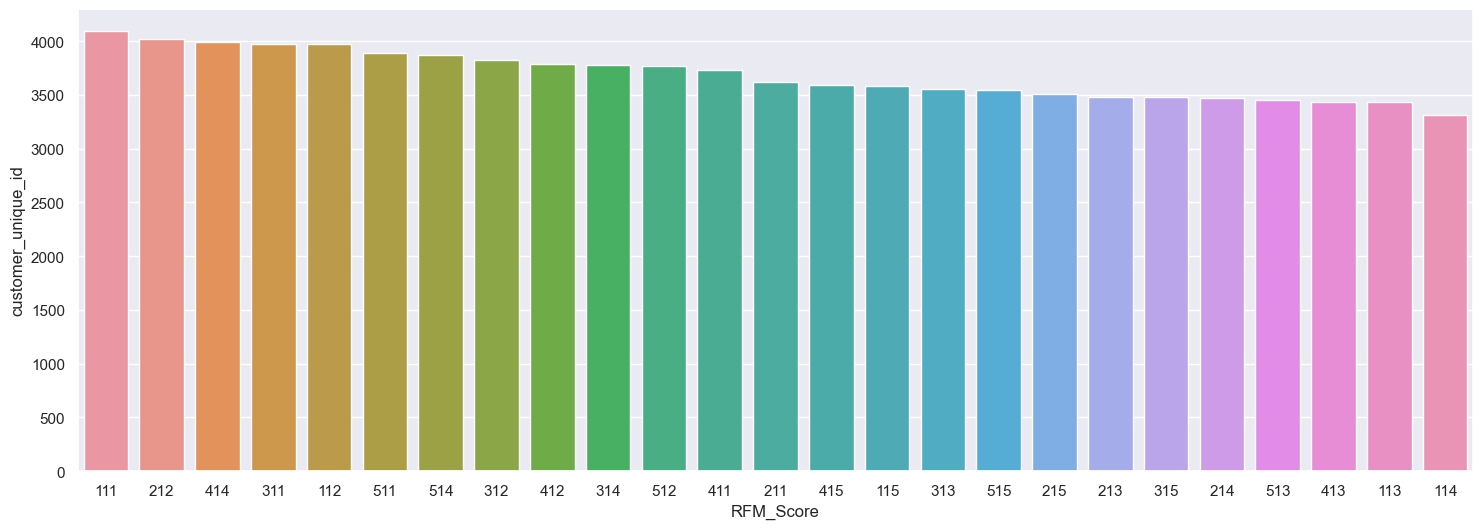

In [814]:
# Визуализируем количество клиентов по сегментам
sns.barplot(x='RFM_Score', y='customer_unique_id', data=df.head(25))

In [815]:
# Напишем функцию, которая строит границы метрик recency, frequency и monetary
def boundary_RFM_segments(data,seg):
    for i in seg:
        df = data[data.RFM_Score == i] # отфильтровываем данные по интересующему нас сегменту
        r_minn = df.Recency.min() # определяем нижнюю границу по Recency
        r_maxx = df.Recency.max() # определяем верхнюю границу по Recency
        f_minn = df.Frequency.min() # определяем нижнюю границу по Frequency
        f_maxx = df.Frequency.max() # определяем верхнюю границу по Frequency
        m_minn = round(df.Monetary.min(), 2) # определяем нижнюю границу по Monetary
        m_maxx = round(df.Monetary.max(), 2) # определяем верхнюю границу по Monetary
        print (f'RFM-сегмент {i} (recency={i[0]}, frequency={i[1]}, monetary={i[2]}) имеет границы метрик recency от {r_minn} до {r_maxx} дней, frequency от {f_minn} до {f_maxx} заказов, monetary от {m_minn} до {m_maxx} рублей')

In [816]:
# Создадим список сегментов, который передадим в функцию
sp_seg = RFM.RFM_Score.value_counts().reset_index()['index'].to_list()

In [817]:
# Выводим границы по всем сегментам
boundary_RFM_segments(RFM, sp_seg)

RFM-сегмент 111 (recency=1, frequency=1, monetary=1) имеет границы метрик recency от 383 до 695 дней, frequency от 1 до 3 заказов, monetary от 3.9 до 39.9 рублей
RFM-сегмент 212 (recency=2, frequency=1, monetary=2) имеет границы метрик recency от 269 до 382 дней, frequency от 1 до 3 заказов, monetary от 39.95 до 69.9 рублей
RFM-сегмент 414 (recency=4, frequency=1, monetary=4) имеет границы метрик recency от 93 до 177 дней, frequency от 1 до 3 заказов, monetary от 109.95 до 179.9 рублей
RFM-сегмент 112 (recency=1, frequency=1, monetary=2) имеет границы метрик recency от 383 до 695 дней, frequency от 1 до 3 заказов, monetary от 39.92 до 69.9 рублей
RFM-сегмент 311 (recency=3, frequency=1, monetary=1) имеет границы метрик recency от 178 до 268 дней, frequency от 1 до 3 заказов, monetary от 2.99 до 39.9 рублей
RFM-сегмент 511 (recency=5, frequency=1, monetary=1) имеет границы метрик recency от 1 до 92 дней, frequency от 1 до 3 заказов, monetary от 2.2 до 39.9 рублей
RFM-сегмент 514 (recenc